In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
columns = ['Class'] + [f'Feature_{i}' for i in range(1, 14)]
df = pd.read_csv(url, header=None, names=columns)


X = df.iloc[:, 1:].values  # Features
y = df['Class'].values - 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [2]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X_train.shape[1], 64),  # 13 input features
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 3)  # 3 output classes
        )

    def forward(self, x):
        return self.model(x)

model = NeuralNetwork()


In [3]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [4]:
epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1/20, Loss: 1.0806
Epoch 2/20, Loss: 1.0414
Epoch 3/20, Loss: 0.9975
Epoch 4/20, Loss: 0.9340
Epoch 5/20, Loss: 0.8429
Epoch 6/20, Loss: 0.7206
Epoch 7/20, Loss: 0.5737
Epoch 8/20, Loss: 0.4141
Epoch 9/20, Loss: 0.2667
Epoch 10/20, Loss: 0.1638
Epoch 11/20, Loss: 0.1045
Epoch 12/20, Loss: 0.0709
Epoch 13/20, Loss: 0.0509
Epoch 14/20, Loss: 0.0380
Epoch 15/20, Loss: 0.0299
Epoch 16/20, Loss: 0.0243
Epoch 17/20, Loss: 0.0202
Epoch 18/20, Loss: 0.0168
Epoch 19/20, Loss: 0.0145
Epoch 20/20, Loss: 0.0123


In [5]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 1.0000


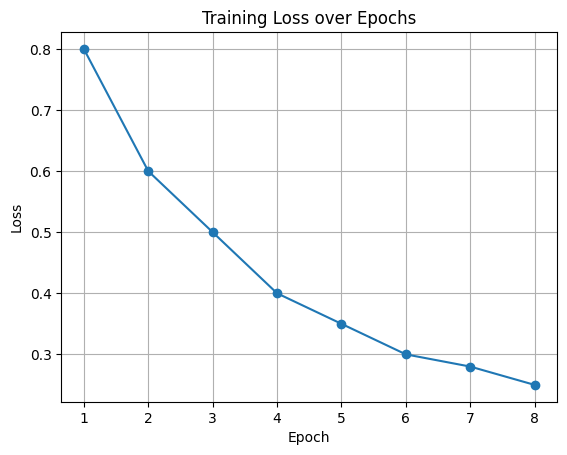

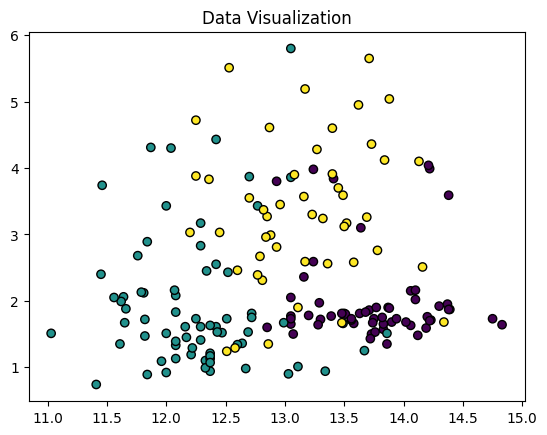

In [7]:
# Example loss visualization
losses = [0.8, 0.6, 0.5, 0.4, 0.35, 0.3, 0.28, 0.25]
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('Data Visualization')
plt.show()